# Predictive Analytics

Predicting the probability of each customer purchasing a product per each visit

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
px.defaults.template = 'plotly_white'
import pickle
from sklearn.linear_model import LogisticRegression

In [2]:
# code description for most of these are available are available in the descriptive analytics notebook


ss = pickle.load(open('scaler.pkl', 'rb'))
pca = pickle.load(open('pca.pkl', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pkl', 'rb'))

df_purchase = pd.read_csv(os.path.join('data', 'purchase data.csv'))
df_purchase.columns = df_purchase.columns.str.replace(' ', '_')
df_purchase.columns = map(str.lower, df_purchase.columns)
features = df_purchase[['sex', 'marital_status', 'age', 'education', 'income',
       'occupation', 'settlement_size']]
dfpss = ss.transform(features)
dfpss_pca = pca.transform(dfpss)
purchase_segm_kmeans_pca = kmeans_pca.predict(dfpss_pca)
df_purchase['segment'] = purchase_segm_kmeans_pca
#remapping the cluster labels for better interpretation like in the first customer analytics section
df_purchase['segment'] = df_purchase['segment'].map({3:0,0:2, 2:1, 1:3}).map({0:'Well-off',  2:'Standard', 1:'Fewer-Opportunities', 3:'Career-Focused'})


In [3]:
segment_dummies = pd.get_dummies(df_purchase['segment'], prefix='segment')
df_purchase_predictors = pd.concat([df_purchase, segment_dummies], axis=1)

In [4]:
df_purchase_predictors

,id,day,incidence,brand,quantity,last_inc_brand,last_inc_quantity,price_1,price_2,price_3,...,age,education,income,occupation,settlement_size,segment,segment_Career-Focused,segment_Fewer-Opportunities,segment_Standard,segment_Well-off
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,Fewer-Opportunities,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,Fewer-Opportunities,0,1,0,0


In [5]:
y = df_purchase_predictors['incidence']

In [6]:

X = pd.DataFrame()

In [7]:
# Reducing the 5 prices to their average
X['mean_price'] = df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [8]:
X.head()

,mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030


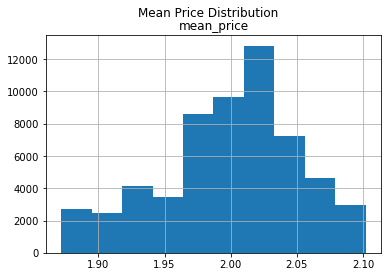

In [9]:
X.hist()
plt.suptitle('Mean Price Distribution');

In [10]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model_purchase.coef_

array([[-2.3484792]])

As we can expect reducing the price has a positive effect on purchasing

## Calculating Price Elasticity 

Price elasticity of purchase probability is the percentage change in purchase probability in response to a one percent change in the respective aggregate price for the product category.


In [12]:
df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].min().min()

1.1

In [13]:
df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].max().max()


2.8

In [14]:
# Creating an array from 1 to 2.99 for the price range.
df_price = pd.DataFrame(np.arange(0.5, 3.5, 0.01))

In [15]:
y_pr = model_purchase.predict_proba(df_price)

In [16]:
# resulting array has two columns: the probability of no purchase, the probability of purchase. the higher the price becomes they increase and decrease. 
y_pr[0:5, :]

array([[0.08221534, 0.91778466],
       [0.08400488, 0.91599512],
       [0.08582973, 0.91417027],
       [0.08769043, 0.91230957],
       [0.08958752, 0.91041248]])

In [17]:
purchase_pro = y_pr[:,1]

In [18]:
# price elasticity: pe
pe = model_purchase.coef_ * df_price[0].values * (1 - purchase_pro)

In [19]:
pe[:, 0:5]

array([[-0.0965405 , -0.10061469, -0.10481606, -0.10914775, -0.11361299]])

In [20]:
df_price.rename(columns={0:'price_point'}, inplace=True)

In [21]:
df_price

,price_point
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [22]:
df_price_elasticities = df_price.copy()

In [23]:
df_price_elasticities['mean_pe'] = pe[0]

In [24]:
df_price_elasticities

,price_point,mean_pe
0,0.50,-0.096541
1,0.51,-0.100615
2,0.52,-0.104816
3,0.53,-0.109148
4,0.54,-0.113613
...,...,...
295,3.45,-8.014579
296,3.46,-8.039829
297,3.47,-8.065045
298,3.48,-8.090227


In [25]:
fig = px.scatter(df_price_elasticities, x='price_point', y='mean_pe',
                 title='Price Elasticity of Purchase Probability',
                 labels={'mean_pe':'Price Elasticity',
                         'price_point':'Price Point'})
fig.update_yaxes(dtick=1)

#### Interpretation  

Price elasticity decreases as price increases and the less likely it will become for people to buy a product.  

Between the range of 0.5 and 1.1, the decrease in the elasticity seems to be slow. After 1.1, it becomes steeper.  

Elasticity values are negative since the model coefficient was negative which indicates the inverse proportionality between price and purchase probability.  


Elasticity measures the percentage in an output variable. In this case this is the purchase probability given a percent change in an input variable which is the price.  

Now if this percent change is greater than 100 percent we say that the output or purchase probability is called elastic. On the other hand for changes less than 100 percent it is inelastic.

In other words if the elasticity has a value smaller than one in absolute terms we say it is inelastic. If it is greater than one we say it is elastic.  

As an example at price point 0.5, an increase of price in 1% will lead to the decrease of purchase probability of -0.096%, this is considered to be inelastic.  At price point 2, an increase of 1% in price will lead to the decrease of -3.53% in the purchase probability and this is considered to be elastic.  

Thus the general recommendation would be to increase the price for inelastic values. This range includes price points from \$0.5 to \$1.25 and increasing the price in this range wouldn't lead to too much decrease in purchase probability.  In prices higher than 1.25 we would gain more if we reduce our price and thus increase our purchase probability. 

## Purchase Elasticities for Different Segments

## Seg 0

In [26]:
# ({0:'Well-off',  2:'Sandard', 1:'Fewer-Opportunities', 3:'Career-Focused'})

In [27]:
df_pa_seg_0 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Well-off']

In [28]:
y = df_pa_seg_0['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_0[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [29]:
model_incidence_seg_0 = LogisticRegression(solver = 'sag')
model_incidence_seg_0.fit(X,y)
model_incidence_seg_0.coef_
# We observe that the price coefficient for the career focused is -1.24, whereas for the average customer it was -2.35.

array([[-1.24562989]])

In [30]:
y_pr_seg_0 = model_incidence_seg_0.predict_proba(df_price[['price_point']])
purchase_pro_seg_0 = y_pr[:,1]
pe_seg_0 = model_incidence_seg_0.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_0)
df_price_elasticities['pe_segment_0'] = pe_seg_0[0]

## Segment 1

In [31]:
df_pa_seg_1 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Fewer-Opportunities']
y = df_pa_seg_1['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_1[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_1 = LogisticRegression(solver = 'sag')
model_incidence_seg_1.fit(X,y)
model_incidence_seg_1.coef_
# We observe that the price coefficient for the few opportunities is -3.4, whereas for the average customer it was -2.35.


array([[-3.63950612]])

In [32]:
y_pr_seg_1 = model_incidence_seg_1.predict_proba(df_price[['price_point']])
purchase_pro_seg_1 = y_pr[:,1]
pe_seg_1 = model_incidence_seg_1.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_1)
df_price_elasticities['pe_segment_1'] = pe_seg_1[0]

## Seg 2

In [33]:
df_pa_seg_2 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Standard']
y = df_pa_seg_2['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_2[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_2 = LogisticRegression(solver = 'sag')
model_incidence_seg_2.fit(X,y)
print(model_incidence_seg_2.coef_)
# We observe that the price coefficient for the standard is -1.5, whereas for the average customer it was -2.35.
y_pr_seg_2 = model_incidence_seg_2.predict_proba(df_price[['price_point']])
purchase_pro_seg_2 = y_pr[:,1]
pe_seg_2 = model_incidence_seg_2.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_2)
df_price_elasticities['pe_segment_2'] = pe_seg_2[0]

[[-1.50812448]]


## Seg 3

In [34]:
df_pa_seg_3 = df_purchase_predictors[df_purchase_predictors['segment'] == 'Career-Focused']
y = df_pa_seg_3['incidence']
X = pd.DataFrame()
X['mean_price'] = df_pa_seg_3[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
model_incidence_seg_3 = LogisticRegression(solver = 'sag')
model_incidence_seg_3.fit(X,y)
print(model_incidence_seg_3.coef_)
# We observe that the price coefficient for the career-focused is -1.7 , whereas for the average customer it was -2.35.
y_pr_seg_3 = model_incidence_seg_3.predict_proba(df_price[['price_point']])
purchase_pro_seg_3 = y_pr[:,1]
pe_seg_3 = model_incidence_seg_3.coef_ * df_price.price_point.values * (1 - purchase_pro_seg_3)
df_price_elasticities['pe_segment_3'] = pe_seg_3[0]

[[-1.71042693]]


In [35]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3
0,0.50,-0.096541,-0.051205,-0.149612,-0.061995,-0.070312
1,0.51,-0.100615,-0.053366,-0.155925,-0.064612,-0.073279
2,0.52,-0.104816,-0.055594,-0.162436,-0.067310,-0.076339
3,0.53,-0.109148,-0.057892,-0.169149,-0.070091,-0.079494
4,0.54,-0.113613,-0.060260,-0.176069,-0.072959,-0.082746
...,...,...,...,...,...,...
295,3.45,-8.014579,-4.250921,-12.420425,-5.146728,-5.837119
296,3.46,-8.039829,-4.264314,-12.459556,-5.162943,-5.855509
297,3.47,-8.065045,-4.277688,-12.498633,-5.179135,-5.873874
298,3.48,-8.090227,-4.291044,-12.537658,-5.195306,-5.892214


In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.mean_pe,
                    mode='lines',
                    name='AVG PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_0,
                    mode='lines',
                    name='Well-off PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_1,
                    mode='lines',
                    name='Fewer-Opportunitites PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_2,
                    mode='lines',
                    name='Standard PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.pe_segment_3,
                    mode='lines',
                    name='Career-Focused PE'))
fig.update_yaxes(dtick=1)
fig.update_layout(height=600, width=800, 
                  title='Price Elasticity of Purchase Probability',
                  template='plotly_white')
fig.update_xaxes(title='Price Point')
fig.update_yaxes(title='Price Elasticity')
fig.show()


### Interpretation  

We observe that the Well-off segment are the least elastic when compared to the rest. So, their purchase probability elasticity is not as affected by price.

Fewer-Opportunitties is the most elastic and price sensitive one. This means with the increase of price they become elastic much more faster. They become elastic at \$1.07 yet the average PE was \$1.25.

The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that the standard segment is least homogenous, which we discovered during our descriptive analysis. It may be that the customers in this segment have different shopping habbits, which is why their customers start with being more elastic than average but then shift to being more inelastic than the average customer and indeed the Career-focused segment.


# Comparing Price Elasticity with and without Promotion

## Purchase Probability with Promotion Feature

In [37]:
y = df_purchase_predictors['incidence']
X = pd.DataFrame()
X['mean_price'] = df_purchase_predictors[['price_'+ str(i) for i in range(1,6)]].sum(axis=1)/5
X['mean_promotion'] = df_purchase_predictors[['promotion_'+ str(i) for i in range(1,6)]].sum(axis=1)/5

In [38]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, y)
dict(zip(model_incidence_promotion.coef_[0], X.columns)) #coefficient

{-1.4939507681346196: 'mean_price', 0.5614451466854176: 'mean_promotion'}

The coefficients show that with the decrease of the price, purchase probability increases.  
Also with the increase of the promotion, purchase probability increases.

## Price Elasticity with Promotion

In [39]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3
0,0.50,-0.096541,-0.051205,-0.149612,-0.061995,-0.070312
1,0.51,-0.100615,-0.053366,-0.155925,-0.064612,-0.073279
2,0.52,-0.104816,-0.055594,-0.162436,-0.067310,-0.076339
3,0.53,-0.109148,-0.057892,-0.169149,-0.070091,-0.079494
4,0.54,-0.113613,-0.060260,-0.176069,-0.072959,-0.082746
...,...,...,...,...,...,...
295,3.45,-8.014579,-4.250921,-12.420425,-5.146728,-5.837119
296,3.46,-8.039829,-4.264314,-12.459556,-5.162943,-5.855509
297,3.47,-8.065045,-4.277688,-12.498633,-5.179135,-5.873874
298,3.48,-8.090227,-4.291044,-12.537658,-5.195306,-5.892214


In [40]:
df_price

,price_point
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [41]:
X = df_price.copy()
X['promotion'] = 1

In [42]:
Y = model_incidence_promotion.predict_proba(X)

In [43]:
promo = Y[:, 1] # probabilities of promotion
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * df_price.price_point) * (1 - promo)

In [44]:
df_price_elasticities['Elasticity_with_Promotion'] = price_elasticity_promo
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3,Elasticity_with_Promotion
0,0.50,-0.096541,-0.051205,-0.149612,-0.061995,-0.070312,-0.125737
1,0.51,-0.100615,-0.053366,-0.155925,-0.064612,-0.073279,-0.129853
2,0.52,-0.104816,-0.055594,-0.162436,-0.067310,-0.076339,-0.134048
3,0.53,-0.109148,-0.057892,-0.169149,-0.070091,-0.079494,-0.138324
4,0.54,-0.113613,-0.060260,-0.176069,-0.072959,-0.082746,-0.142680
...,...,...,...,...,...,...,...
295,3.45,-8.014579,-4.250921,-12.420425,-5.146728,-5.837119,-4.861346
296,3.46,-8.039829,-4.264314,-12.459556,-5.162943,-5.855509,-4.879547
297,3.47,-8.065045,-4.277688,-12.498633,-5.179135,-5.873874,-4.897718
298,3.48,-8.090227,-4.291044,-12.537658,-5.195306,-5.892214,-4.915858


## Price Elasticity without Promotion

In [45]:

X = df_price.copy()
X['promotion'] = 0

Y = model_incidence_promotion.predict_proba(X)
no_promo = Y[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * df_price.price_point *(1- no_promo)
df_price_elasticities['Elasticity_without_Promotion'] = price_elasticity_no_promo

In [46]:
df_price_elasticities

,price_point,mean_pe,pe_segment_0,pe_segment_1,pe_segment_2,pe_segment_3,Elasticity_with_Promotion,Elasticity_without_Promotion
0,0.50,-0.096541,-0.051205,-0.149612,-0.061995,-0.070312,-0.125737,-0.195639
1,0.51,-0.100615,-0.053366,-0.155925,-0.064612,-0.073279,-0.129853,-0.201760
2,0.52,-0.104816,-0.055594,-0.162436,-0.067310,-0.076339,-0.134048,-0.207983
3,0.53,-0.109148,-0.057892,-0.169149,-0.070091,-0.079494,-0.138324,-0.214310
4,0.54,-0.113613,-0.060260,-0.176069,-0.072959,-0.082746,-0.142680,-0.220741
...,...,...,...,...,...,...,...,...
295,3.45,-8.014579,-4.250921,-12.420425,-5.146728,-5.837119,-4.861346,-4.982953
296,3.46,-8.039829,-4.264314,-12.459556,-5.162943,-5.855509,-4.879547,-4.999859
297,3.47,-8.065045,-4.277688,-12.498633,-5.179135,-5.873874,-4.897718,-5.016744
298,3.48,-8.090227,-4.291044,-12.537658,-5.195306,-5.892214,-4.915858,-5.033610


In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.Elasticity_with_Promotion,
                    mode='lines',
                    name='With Promotion PE'))
fig.add_trace(go.Scatter(x=df_price_elasticities.price_point, y=df_price_elasticities.Elasticity_without_Promotion,
                    mode='lines',
                    name='Without Promotion PE'))

fig.update_yaxes(dtick=1)
fig.update_layout(height=600, width=800, 
                  title='Price Elasticity of Purchase Probability with and without Promotion',
                  template='plotly_white')
fig.update_xaxes(title='Price Point')
fig.update_yaxes(title='Price Elasticity')
fig.show()


#### Interpretation

These two lines represent the elasticity of purchase probability given maximum and given minimum promotional activity.

This graph here tells us that the elasticity curve with promotion sits above its respective no promotion counterpart for the entire price range.

Inelasticity for no promotion ends at \$1.27 while for promotion at \$1.46.

That's a difference of almost 20 cents.

So if a product has a regular price of one point thirty dollars the purchase probability is elastic. However if a product cost one point fifty dollars on the regular and its price is reduced to the aforementioned one point thirty dollars during a promotion then our analysis says that purchase probability is still inelastic at this point.

This may sound trivial but it is not. People are more willing to buy products at promotional prices be it because of the large discount signs in some stores or just because psychologically people feel they're getting a bargain. In any case **customers are less price sensitive to similar price changes when there are promotion activities**.  

In other words it pays off to offer discounts.

According to this model if we could incorporate it, it would be more beneficial to have a higher original price and constant promotion rather than a lower original price.

# Modeling Brand Choice  
In this phase we are interested in which brand the customer chooses.  The dataset has a brand variable that shows which brand the customer chose. There is also cases that customer didn't choose any brands. Modeling and predicting brand choices is an extremely important toll as it would help marketers analyze their customers behavior and increase sales goals or increase customer satisfaction. We'll use multinomial logistic regression since we have multiple classes.

In [49]:
df_purchase.brand.value_counts()

0    44055
5     4978
2     4542
4     2927
1     1350
3      841
Name: brand, dtype: int64

Filtering for the occasions a brand was chosen can be either done through the incidence = 1 or the brand not equal to zero. 

In [61]:
# the code checks if there are any incidences the brand wasn't equal to zero but the incidence wasn't equal to 1. any() gives Falses and the sum(), sums up all falses which the result is 0. 
(df_purchase[df_purchase['brand'] != 0] != df_purchase[df_purchase['incidence']==1]).any()

id                   False
day                  False
incidence            False
brand                False
quantity             False
last_inc_brand       False
last_inc_quantity    False
price_1              False
price_2              False
price_3              False
price_4              False
price_5              False
promotion_1          False
promotion_2          False
promotion_3          False
promotion_4          False
promotion_5          False
sex                  False
marital_status       False
age                  False
education            False
income               False
occupation           False
settlement_size      False
segment              False
dtype: bool

In [62]:
(df_purchase[df_purchase['brand'] != 0] != df_purchase[df_purchase['incidence']==1]).any().sum()

0

In [63]:
df_brand_choice = df_purchase[df_purchase['brand'] != 0]

In [78]:
y = df_brand_choice.brand.values
features = ['price_'+str(i) for i in range(1,6)]
X = df_brand_choice[features]

In [79]:
model_brand_choice = LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
model_brand_choice.coef_

array([[-3.91595077,  0.65845961,  2.41773477,  0.70408519, -0.20210478],
       [ 1.274616  , -1.87985462, -0.21263595, -0.20634041,  0.58787415],
       [ 1.62417032,  0.56210774,  0.50083935,  1.03950524,  0.4527725 ],
       [ 0.57454112,  0.39558835, -1.40059605, -1.24624302,  0.24935416],
       [ 0.44262333,  0.26369893, -1.30534212, -0.291007  , -1.08789604]])

In [80]:
model_brand_choice.classes_

array([1, 2, 3, 4, 5], dtype=int64)

#### Interpretation

In [97]:
brand_choice_coefs = pd.DataFrame(model_brand_choice.coef_.T,
                     index=['price_'+str(i) for i in range(1,6)],
                     columns=['coef_brand_'+str(i) for i in range(1,6)]).round(2)

In [98]:
brand_choice_coefs

,coef_brand_1,coef_brand_2,coef_brand_3,coef_brand_4,coef_brand_5
price_1,-3.92,1.27,1.62,0.57,0.44
price_2,0.66,-1.88,0.56,0.40,0.26
price_3,2.42,-0.21,0.50,-1.40,-1.31
price_4,0.70,-0.21,1.04,-1.25,-0.29
price_5,-0.20,0.59,0.45,0.25,-1.09


For brand 1, price 1 is negative while the rest are positive. Normally, the higher the price of our own product the lower the probability for it to be purchased. So it makes sense for the own brand price coefficient to be negative.

On the other hand the more the price of a competitor increases the higher the probability of customers switching to our own brand would be. Hence there is a positive relationship between our own brands purchase probability and a competitive brand increasing their price.

So the choice probability for any one brand and the choice probabilities for all the other brands are interrelated and a marketing mix tool of our brand reflects not only the choice probability for that brand but the choice probabilities for all other brands as well.

These effects are known as own brand effects and Cross brand effects.


### Own price Elasticity - Brand 5 (most expensive) 

This can be applied to all other brands as well.

In [118]:

df_brand_5 = pd.DataFrame(index=range(0,df_price.shape[0])) #setting the number of the index



In [119]:
# across the other brands the price will remain fixed
for col in ['price_' + str(i) for i in range(1,5)]: # for prices 1 through 4
    df_brand_5[col] = df_brand_choice[col].mean()
# calculating the purchase probability of brand 5 on its changes for different price points
df_brand_5['price_5'] = df_price.price_point

In [120]:
df_brand_5

,price_1,price_2,price_3,price_4,price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [134]:
model_brand_choice.predict_proba(df_brand_5)# probabilities of being a brand for each 5
model_brand_choice.predict_proba(df_brand_5)[:,4] # probabilities of being brand 5

array([0.90999016, 0.90894707, 0.90789229, 0.90682569, 0.90574718,
       0.90465663, 0.90355394, 0.902439  , 0.90131169, 0.9001719 ,
       0.89901952, 0.89785443, 0.89667653, 0.89548569, 0.89428181,
       0.89306477, 0.89183446, 0.89059075, 0.88933355, 0.88806273,
       0.88677819, 0.88547979, 0.88416744, 0.88284102, 0.88150042,
       0.88014551, 0.87877619, 0.87739235, 0.87599386, 0.87458063,
       0.87315252, 0.87170945, 0.87025128, 0.86877792, 0.86728925,
       0.86578515, 0.86426553, 0.86273027, 0.86117926, 0.8596124 ,
       0.85802958, 0.8564307 , 0.85481564, 0.8531843 , 0.85153659,
       0.8498724 , 0.84819163, 0.84649417, 0.84477994, 0.84304883,
       0.84130074, 0.83953559, 0.83775328, 0.83595371, 0.8341368 ,
       0.83230245, 0.83045059, 0.82858112, 0.82669396, 0.82478903,
       0.82286626, 0.82092555, 0.81896684, 0.81699005, 0.81499512,
       0.81298196, 0.81095052, 0.80890072, 0.80683252, 0.80474584,
       0.80264063, 0.80051684, 0.79837442, 0.7962133 , 0.79403

In [141]:
# calculating the price elasticity
# the coefficient is in the brand_choice_coefs table for price_5 and coef_brand_5 which is -1.09
brand_choice_coefs['coef_brand_5'][4]

-1.09

In [142]:
beta5 = brand_choice_coefs['coef_brand_5'][4]

In [ ]:
own_price_plasticity_brand_5 = 